Decision Tree Accuracy: 0.776536312849162
Decision Tree Report:
               precision    recall  f1-score   support

           0       0.77      0.92      0.83       110
           1       0.81      0.55      0.66        69

    accuracy                           0.78       179
   macro avg       0.79      0.73      0.74       179
weighted avg       0.78      0.78      0.77       179



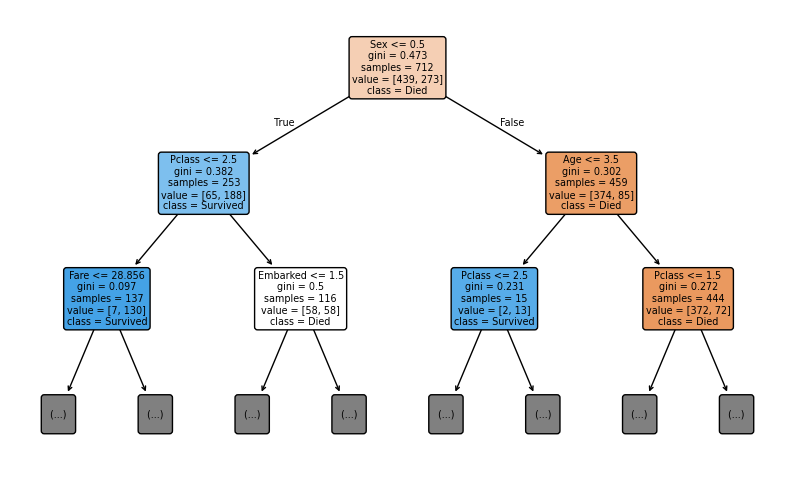

Random Forest Accuracy: 0.8212290502793296
Random Forest Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       110
           1       0.79      0.72      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179

Top Features:
 Fare        0.317289
Sex         0.275194
Age         0.273414
Pclass      0.097542
Embarked    0.036561
dtype: float64


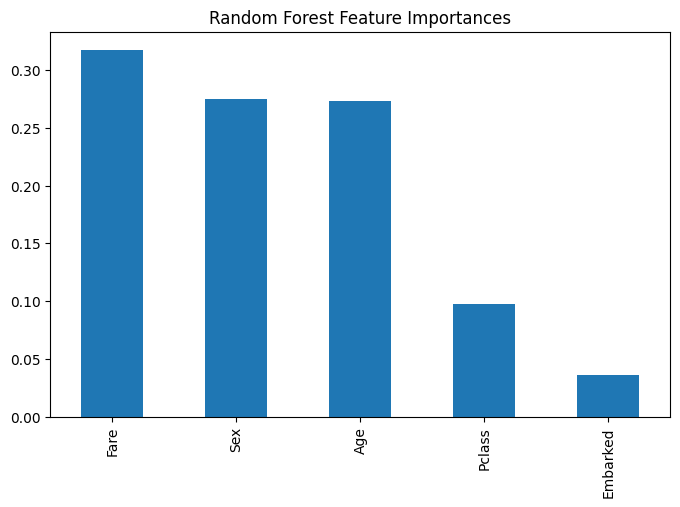

'\nExplanation (easy points):\n- Fill missing Age with median, Embarked with most common.\n- Convert Sex & Embarked into numbers using LabelEncoder.\n- Decision Tree is like asking questions step by step.\n- Random Forest is many trees together for better accuracy.\n- Feature importance tells which columns matter the most.\n'

In [1]:
"""
Day 5 — Simple Decision Tree & Random Forest on Titanic dataset
-------------------------------------------------------------
This version is kept **simple and easy to understand**:
- Loads Titanic CSV (train.csv)
- Basic preprocessing (fill missing values, encode categories)
- Decision Tree + Random Forest
- Evaluate with accuracy and classification report
- Show feature importances
"""

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# -------------------
# 1) Load Titanic data
# -------------------
df = pd.read_csv("Data/train.csv")  # make sure 'train.csv' from Kaggle Titanic dataset is in the folder

# Target column
y = df["Survived"]

# Select a few simple features
X = df[["Pclass", "Sex", "Age", "Fare", "Embarked"]].copy()

# -------------------
# 2) Handle missing values
# -------------------
X["Age"] = X["Age"].fillna(X["Age"].median())
X["Embarked"] = X["Embarked"].fillna("S")

# -------------------
# 3) Encode categorical variables
# -------------------
label_encoders = {}
for col in ["Sex", "Embarked"]:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# -------------------
# 4) Train/Test split
# -------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# -------------------
# 5) Decision Tree
# -------------------
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)

# Predictions
y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree Report:\n", classification_report(y_test, y_pred_dt))

# Plot tree (top levels)
plt.figure(figsize=(10,6))
plot_tree(dt, feature_names=X.columns, class_names=["Died", "Survived"], filled=True, rounded=True, max_depth=2)
plt.show()

# -------------------
# 6) Random Forest
# -------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))

# Feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Top Features:\n", importances)

# Plot importances
plt.figure(figsize=(8,5))
importances.plot(kind='bar')
plt.title("Random Forest Feature Importances")
plt.show()

"""
Explanation (easy points):
- Fill missing Age with median, Embarked with most common.
- Convert Sex & Embarked into numbers using LabelEncoder.
- Decision Tree is like asking questions step by step.
- Random Forest is many trees together for better accuracy.
- Feature importance tells which columns matter the most.
"""
